# Project Report - Classification of Irises
By: Harjas Bansoota and Koyah Morgan-Banke

## Introduction 

### Background Info:
Irises are a common perennial plant known for their brilliance in colour and universally identifiable petal/sepal shape. Iris flowers can be categorized into many different varieties, this dataset in particular considers three possible varieties – Iris Versicolor, Iris Setosa, and Iris Virginica. The model we intend to create will classify Irises by their petals and sepals dimensions (in cm) and categorise them based on the average measurements of their according species. These measurment are important to use because each variation has its own unique and distinct average for each measurement. This will allow us to classify the Iris flower samples into one of the three species - Setosa, Versicolor, or Virginica.


### Goal:
The question we are trying to answer is, given the length and the width of the sepals and petals, in centimeters, which one of the three species - Setosa, Versicolor, or Virginica - is it? This will be acheived using the KNN Classification algorithm.



### About the dataset
British statistician and biologist Ronald Fisher presented this dataset in his 1936 paper titled *The Utilization of Multiple Measurements in Taxonomic Challenges* as an examle of linear discriminant analysis. This dataset is also known as Anderson's Iris dataset, as Edgar Anderson compiled the data to assess the morphological diversity among Iris flowers of three closely related species. (Wikipedia Contributors)

### Details on the contents of the dataset

The data set is composed of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). The length and the width of the sepals and petals was measured in centimeters. Its name is Iris Species.
 
####  Columns
 
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

# Methods & Results


## Preprocessing  and Exploratory Data Analysis

### Importing libraries and Setting Seed

The first thing we will do is import all the neccesary libraries needed.

In [32]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(cowplot)
library(repr)
library(RColorBrewer)


### Importing Dataset
Here we load the data from the repository it is housed in and ready it for analysis.

In [33]:
dataset_url <- "https://raw.githubusercontent.com/Harjas6/DSCI-100-Proj/main/IRIS.csv"
iris_data <-read_csv(dataset_url) 

# Data is already tidy so we just need to change our response variable to a factor
iris_data <- iris_data |> mutate(species= as_factor(species))
head(iris_data)


Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (4): sepal_length, sepal_width, petal_length, petal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sepal_length,sepal_width,petal_length,petal_width,species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


*Figure 1*

### Splitting Data Into Training and Testing Sets

We will split our data into training and testing sets before working on the model or doing any exploratory data analysis. We will be predicting `species` so it will be what the splits are stratified by. 80% of the data will be in the training set and 20% will be in the testing set.

In [34]:
set.seed(459)

iris_split <- initial_split(iris_data, prop = 0.8, strata = species)
iris_training <- training(iris_split)
iris_testing <- testing(iris_split)

### Obtaining Summary Statistics
Below we will check to see if each species has the same amount of observations to ensure balance as well as the mean of each predictor variable for each species to check for any patterns that could help us.

In [35]:
iris_summary<-iris_training |>
                group_by(species) |>
                summarize(avg_sepal_len = mean(sepal_length),
                          avg_sepal_wid = mean(sepal_width),
                          avg_petal_len = mean(petal_length),
                          avg_petal_wid = mean(petal_width),
                         number_of_obs = n())

iris_summary

species,avg_sepal_len,avg_sepal_wid,avg_petal_len,avg_petal_wid,number_of_obs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Iris-setosa,5.0475,3.455,1.4725,0.2550,40
Iris-versicolor,5.9400,2.785,4.2925,1.3375,40
Iris-virginica,6.5650,3.000,5.5475,2.0425,40


*Figure 2*

As seen in Figure 2, we can see that there is the same amount of observations for each species which means the observations are balanced. We also notice that the average sepal width and length for Iris Versicolor and Iris Virginica are similar. This is something we will explore further by visualizing the relationship through scatterplots to determine if this observation will help us with our model.

### Visualizing the Relationship Between Predictors and Class Using the Training Set

Since the 4 predictors variables have natural grouping to them - the sepal and the petal both having a length and width - we will be plotting these in a scatterplot, and coloring the points by the species of Iris to see if we can find a relationship that can help us. Specifically, we will make two scatterplots with the first being `sepal_length` vs `sepal_width` and the second being `petal_length` vs `petal_width`, coloring both by `species`.

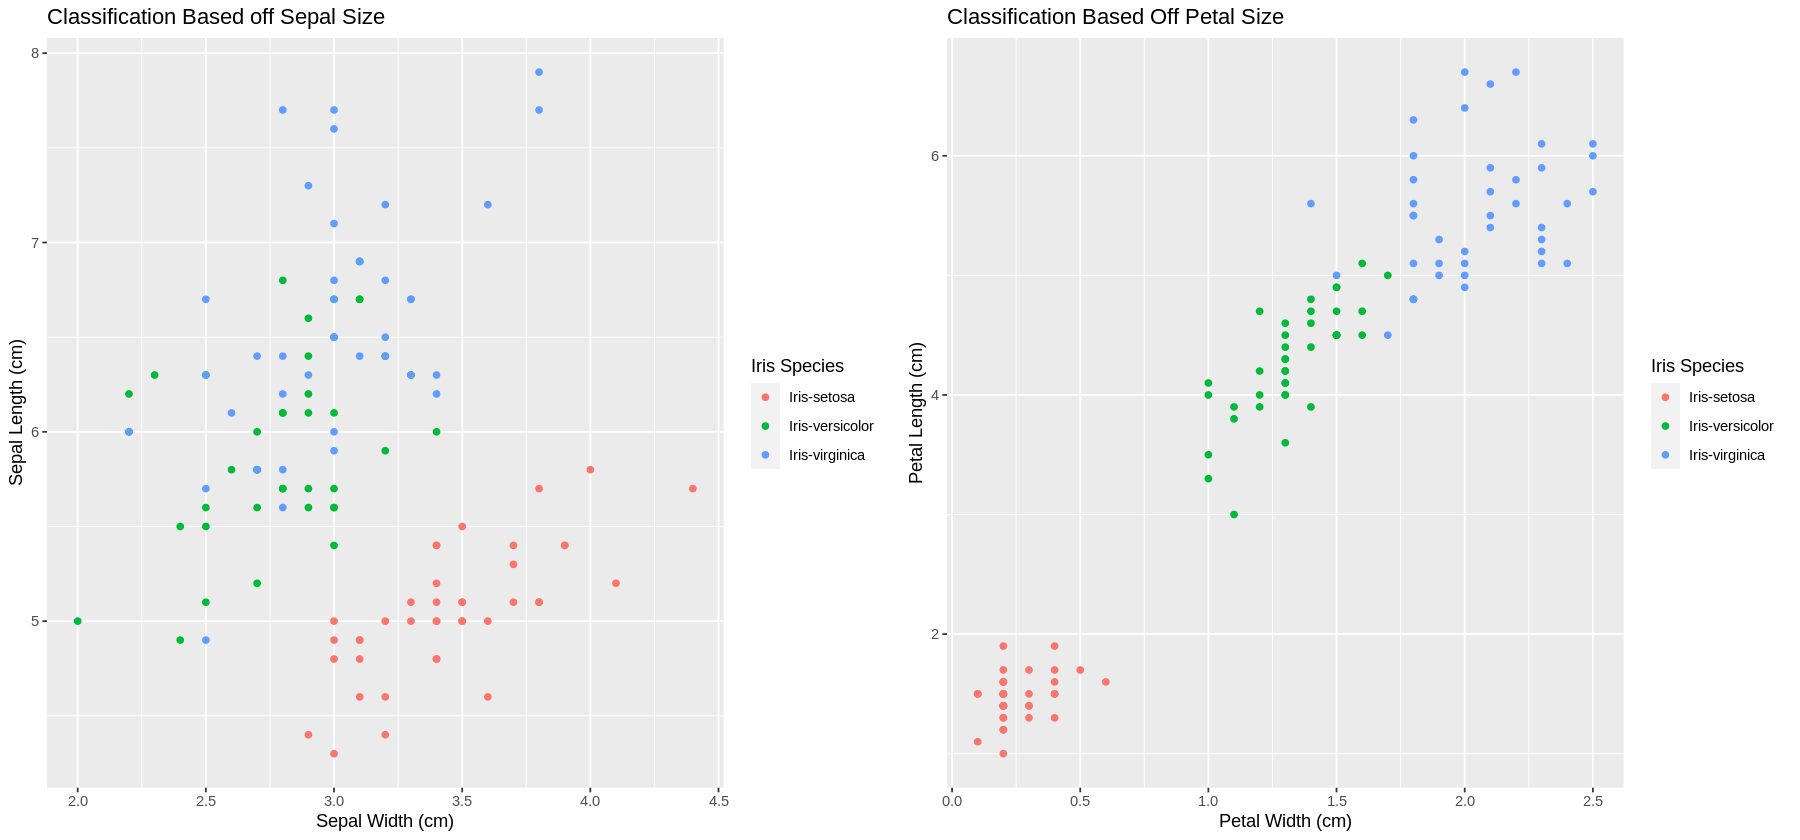

In [36]:
# graph dimensions
options (repr.plot.width=15, repr.plot.height=7)


#sepal scatterplot
sepal_visual <- iris_training |>
    ggplot(aes(y=sepal_length, x = sepal_width, color = species)) + geom_point() +
    labs(y = "Sepal Length (cm)", x = "Sepal Width (cm)", color = "Iris Species") +
    ggtitle("Classification Based off Sepal Size")

#petal scatterplot
petal_visual <- iris_training |>
    ggplot(aes(y=petal_length, x = petal_width, color = species)) + geom_point() +
    labs(y = "Petal Length (cm)", x = "Petal Width (cm)", color = "Iris Species") +
    ggtitle("Classification Based Off Petal Size")

#plotting them side by side
plot_grid(sepal_visual, petal_visual,  ncol = 2, nrow = 1)

*Figure 3*

The graph on the left in Figure 3 show us that the sepal size of Iris Versicolor and Iris Virginica overlap completely, while Iris Setosa sepal size is distinct. The grpah on the right in FIgure 3 shows that the petal size of each variety of Iris flowers is very distinct from each other beside a very small overlap between Iris Versicolor and Iris Virginica . Noting this, it is clear that we should only consider the variables that make up petal size - `petal_length` and `petal_width` - as they are already naturally grouped into their respective species using these variables, while sepal size has a large overlap between two species which would make it difficult to accurately classify the Iris. Knowing this, we can now remove the `sepal_length` and `sepal_width` columns from both sets of data.

In [37]:
# Can't run this twice in a row without running previous cell splitting the data
# due to the first time removing the columns, so the second time will throw an error saying columns DNE
# Make sure to check that if this cell fails to run before assuming this code is buggy
iris_training<-select(iris_training,-c(sepal_length, sepal_width))
iris_testing<-select(iris_testing,-c(sepal_length, sepal_width))

## Performing the Data Analysis
### Finding the Best K-value
To find the best k-value (neighbors) we will need to use 5-fold cross-validation on the training data set to select the optimal *k* for our classification.

This means we will do the following tasks:
- Create model specification tuning on the number of neighbours
- Create a recipe that uses `petal_length` and `petal_width` as predictors. Here we also steps for scaling and centering the data.
- Perform 5-fold cross validation using a workflow that tries neighbours 1 through 91 as thats all possible k-values we can test
- Collect the metrics from the results of the workflow analysis
- Extract the accuracies and visualize it to find the most accurate *k*


In [38]:
# for reproducibility
set.seed(459)

# The number of neighbours we will try
k_values<-tibble(neighbors=seq(from=1,to=91))

# Create model specification with tuning on the number of neighbours
knn_iris_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")

# Create a recipe that uses  predictors specified and normalize them
knn_iris_recipe<-recipe(species~petal_length+petal_width,data=iris_training)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Perform 5-fold cross validation
k_vfold<-vfold_cv(iris_training,v=5,strata=species)

# Create a workflow analysis trying k in vals
knn_result<-workflow()|>
    add_recipe(knn_iris_recipe)|>
    add_model(knn_iris_spec)|> 
    tune_grid(resamples=k_vfold,grid=k_values)


# Collect the metrics
knn_metrics <- knn_result |> collect_metrics()

accuracies <- knn_metrics |>
    filter(.metric =="accuracy")|>
    select(neighbors, mean) |>
    arrange(desc(mean))

head(accuracies)

neighbors,mean
<int>,<dbl>
37,0.9666667
38,0.9666667
39,0.9666667
40,0.9666667
41,0.9666667
42,0.9666667


*Figure 4*

From Figure 4, $k=37$ to $k=42$ gives us the highest accuracy at 96.67%. To further view how the k-value effects the accuracy for all k-values tested, we can plot a line graph of accuracy vs *k*.

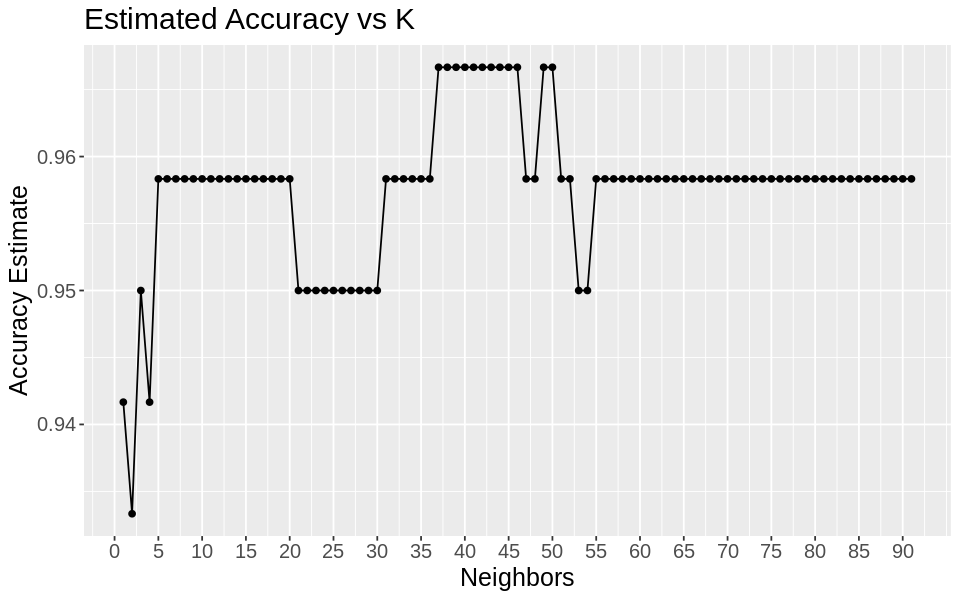

In [39]:
#graph size
options (repr.plot.width=8, repr.plot.height=5)

acc_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Estimated Accuracy vs K") +
    scale_x_continuous(breaks = seq(0, 91, by = 5 )) + # adjusting the x-axis
    theme(text = element_text(size = 15))

acc_vs_k

*Figure 5*

From Figure 4 and 5, it is clear the $k=37$ all the way up to around $k=47$ is the best k-values as well as another peak around $k=50$. We will use $k=37$ because it has the best accuracy and lowest computaional cost compared to higher *k* values that share the same accuracy but higher computaional cost.

### Building the Model

Now that we have a *k* value, we can build our model with that *k* value and then fit it to the training data.

In [40]:

set.seed(459)

#  neighbors that gave the highest accuracy
best_neighbors <- 37


#  model specification with the best value for k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_neighbors) |> 
            set_engine("kknn") |> 
            set_mode("classification") 

# fit to training
knn_fit <- workflow() |> 
            add_recipe(knn_iris_recipe) |> 
            add_model(knn_spec) |> 
            fit(data = iris_training) 

### Predicting on Test Data
Using the model we just built, we can now predict using our `iris_testing` portion of the data.

In [41]:

set.seed(459)

iris_predict <- predict(knn_fit, iris_testing) |> 
                bind_cols(iris_testing)

test_metrics <- iris_predict |>
    metrics(truth = species, estimate = .pred_class) |>
    select(-.estimator) |>
    filter(.metric == 'accuracy')

test_metrics

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


*Figure 6*

Figure 6 shows us that the accuracy of our model on our test dataset is 96.67%, which is the same as what we had previously estimated it to be. We can now look at the confusion matrix to get mor einforation about what it is weak at classifying.

In [42]:
set.seed(459)
conf_mat<- iris_predict |>
    conf_mat(truth = species, estimate = .pred_class)
conf_mat

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

*Figure 7*

From Figure 7, we can see that the classifier labeled 29 out of 30 classifications correctly, with the one mistake being labeling a Iris Virginica as an Iris Versicolor. This was expected as when looking at the scatterplots in Figure 3, we could see that Iris Setosa was clearly seperated from the other species whihc is reflected in its perfect classification. The other two species were also mostly seperated in the scatterplot, albeit a small overlap between Iris Versicolor and Iris Virginica which is reflected in their classifications only having  1 mistake. To confirm that the misclassification came from the region where the data overlaps we can visualize our results.

### Visualizing the Results

To visualize the results we can plot the test data and color is by if it is accurately predicted or not, and compare that to Figure 3 to see if the one point misclassified falls in the small region of overlap seen in Figure 3.

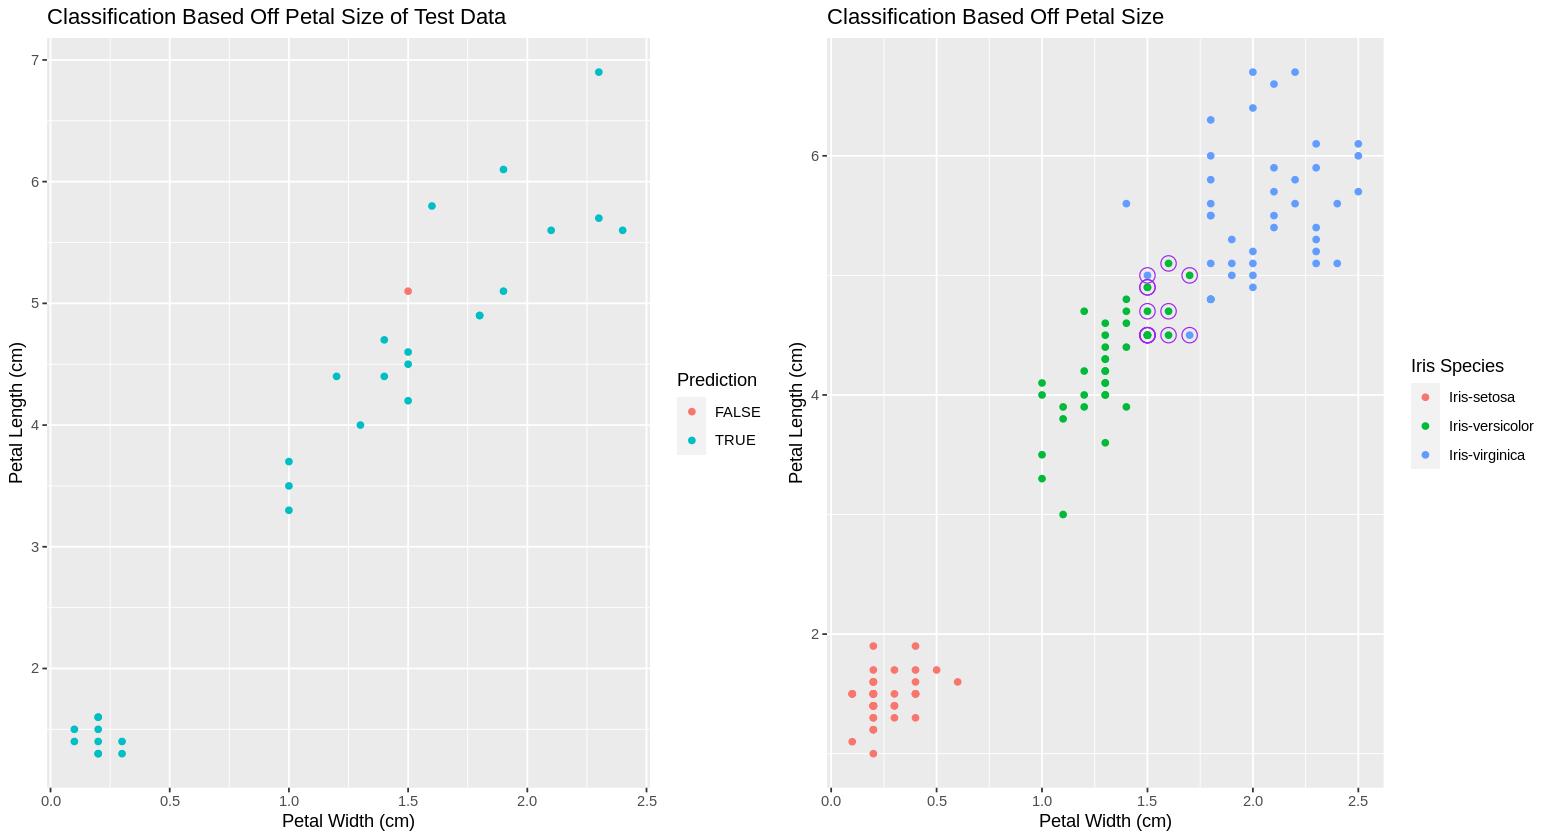

In [43]:
options(repr.plot.width=13, repr.plot.height=7)

petal_test<-ggplot(iris_predict, aes(x=petal_width,y=petal_length,color = .pred_class==species)) + geom_point() +
    labs(y = "Petal Length (cm)", x = "Petal Width (cm)", color = "Prediction") +
    ggtitle("Classification Based Off Petal Size of Test Data")
petal_circled<- petal_visual +geom_point(data=iris_training |> filter(petal_width > 1.45 & petal_width < 1.8),
             pch=21,
             size=4,
             colour="purple") 
plot_grid(petal_test, petal_circled,  ncol = 2, nrow = 1)

*Figure 8*

As seen in left graph of Figure 8, our misclassified point was in fact in the same area as the overlap in the points from Figure 3, which have been redrawn and circled in the right graph of Figure 8. This confirms our previous expectation that the missclasifed point arose from this area of the graph. This also shows us that our model is extremely accurate for all points that do not fall in that small region that overlaps, as every other point was properly classfied.

## Discussion

### Summary

Through our exploratory analysis we realized that there is not a strong relationship between the sepal measurements of an Iris flower and their species. The results of the visualization in Figure 3 revealed this. By observing the sepal size plot, we can see that there is very little distinguishable grouping of the species Iris Versicolor and Virginica, while the petal size plot has distinguishable grouping. Taking this fact into account, our team decided that sepal measurements will have a negative effect on accurately predicting the species to include it in our classification model as a predictor variable. We did keep in mind that eventhough the petal size had distinguishable groups, that their was a small overlap that could cause inaccuracies. After making the decision to remove sepal meaurements as a predictor variable, we built our model which confirmed our decision of removing sepal measurments as it had 97% accuracy only using the petal measuremnts.


Our analysis revealed that in general, Iris Setosa is the species of Iris with the smallest average petal width and
length by quite a bit, whereas Iris Virginica and Versicolor are closer in size (Iris Versicolor being, on average, smaller then Versicolor) resulting in possible misclassifications.


This possibility of misclaffication is seen in the regions observed in Figure 8. Creating this visualization exposed an area of potential error that could occur during predictive analysis – there was slight overlap between the variables Iris Virginica and Iris Versicolor around petal length of 5cm and petal width of 1.5cm. (Figure 3 had previously predicted this area of potential error through also showing overlap). To analyze this, our group considered the vast separation of Iris Setosa petal measurements and concluded that Iris Setosa predictions will be 100% accurate as their petal sizes are nowhere near the other species while Iris Virginia and Versicolor have a small chance of being misclassfied.

### Is What We Expected To Find?

We expected our model to be as accurate as it was as through the exploratory data analysis, it was clear that the reltionship between petal length and width was strong enough to accurately classify Iris species most of the time. We had speculated there would be a small degree of error due to the overlap between Iris Versicolor and Iris Virginica which was then seen in our model making a mistake in classifying an Iris Virginica as an Iris Versicolor once corresponding to the small overlap we had noticed in Figure 3. This was visualized in Figure 8. 

### What Impact Could Such Findings Have?
The impact of our findings could help improve the efficiency of Iris Species classification. As mentioned above, our exploratory analysis on this dataset revealed that using Iris flower petal measurements are far more indicative of the species of Iris then sepal measurements are. Our observations could be useful to anyone in the future who is quickly trying to determine the specific species of an Iris flower as they would just need to measure the petal length and width. This observation could also encourage more research to be done surrounding the quantitative factors that distinguish Iris species from each other or other plant-related research that needs to be able to classify Iris flowers. Building on the ability to classify Iris flowers,this could used in botany, agriculture, and environmental industries as well as being a foundation to tackling other classification problems. For example, if someone is trying to classify  Iris Species using a different model, they could compare its accuracy to this one as a baseline or use them in tandem. Essentially, our model can be used in research and commerical appplications as well as machine learning research into building better models.


### What Future Questions Could This Lead To?
The first question that we believe this project could lead to is in regard to the variables in this dataset - are there more quantitative variables (would height or mass be useful) surrounding Iris flowers that could be used to perform a more accurate species prediction? To extend onto this question, is the relationship between petal length/width and the predicted species strong enough to identify the correct species if more Iris subspecies were included in our dataset as there are "up to 300 [Iris] species" (Wikipedia Contributors). Moreover, these subspecies are divided into "6 subgenera" (Wikipedia Contributors) so it raises the question whether this model can be applied to all 300 species, just some of the 6 groups, or if the relation between petal size and species is specific to just the three species we classified in  our model. Also, how could this be extended to other species of flowers and if extended, would sepal length and width play a role, or would it be ignored like it was for the Iris species we examined? Essentially, most the quetions arise into how this applies to classifying flowers in general and whether Iris flowers could be directly subsituted for a different species of flower, or if the methods of analysis would need to be tailored specifically for each species.

### Bibliography

“Iris Dataset.” Www.kaggle.com, www.kaggle.com/datasets/vikrishnan/iris-dataset.

Wikipedia Contributors. “Iris (Plant).” Wikipedia, Wikimedia Foundation, 7 Nov. 2019, en.wikipedia.org/wiki/Iris_(plant).

Wikipedia Contributors. “Iris Flower Data Set.” Wikipedia, Wikimedia Foundation, 18 Apr. 2019, en.wikipedia.org/wiki/Iris_flower_data_set.
